This notebook is one of two parts that make the 1$^{\rm st}$ computational assignment (session-1) of the course of "*Introduzione alla Fisica Statistica*" and "*Meccanica Statistica 1*" at the University of Milan. The exercises in here were originally prepared by Dr Francesc Font-Clos and later adapted by Prof C. Barbieri. These are the assignments given in **Spring 2020**.

Cells can be added and removed using the "+" and "scissor" icons above. Code-type cells can be executed with Shift+Return.
The following are initial imports of libraries and must execute before everything else.

In [1]:
# multidimensional arrays
import numpy as np
import math

# inline plots
import matplotlib.pyplot as plt
%matplotlib inline

# nicer figures
import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

# Generating uniformly distributed random numbers
We will use `numpy` to generate random numbers. To generate numbers uniformly distributed between 0 and 1, we can use the function `np.random.uniform()`. If you execute the cell below more than once, you will see how the output changes.

In [2]:
x = np.random.uniform()
print(x)

0.17948692608074546


To generate many random numbers at once, use the `size` keyword

In [3]:
x_1d = np.random.uniform(size=10)
print(x_1d)

[0.51764427 0.93896628 0.5934254  0.52512147 0.41069521 0.57426129
 0.30663884 0.68734979 0.53278469 0.63667704]


We can also generate a whole matrix of random uniform numbers at once!

In [4]:
x_2d = np.random.uniform(size=(3, 3))
print(x_2d)

[[0.69937395 0.96536683 0.709882  ]
 [0.55727392 0.96096518 0.46251237]
 [0.458764   0.02328462 0.66765439]]


Note that you can use the `?` command to get a quick view of a function's documentation:

In [5]:
np.random.uniform?

Docstring:
uniform(low=0.0, high=1.0, size=None)

Draw samples from a uniform distribution.

Samples are uniformly distributed over the half-open interval
``[low, high)`` (includes low, but excludes high).  In other words,
any value within the given interval is equally likely to be drawn
by `uniform`.

.. note::
    New code should use the ``uniform`` method of a ``default_rng()``
    instance instead; see `random-quick-start`.

Parameters
----------
low : float or array_like of floats, optional
    Lower boundary of the output interval.  All values generated will be
    greater than or equal to low.  The default value is 0.
high : float or array_like of floats
    Upper boundary of the output interval.  All values generated will be
    less than high.  The default value is 1.0.
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  If size is ``None`` (default),
    a single value is returned if `

### Exercise
How would you generate 1000 random numbers uniformely distributed between 5 and 20?

In [6]:
# write your code here
data = np.random.uniform(5, 20, 1000)

### Plotting the density of a sample
As a simple sanity check, we want to plot the density of the data we have generated. We will use the function `plt.hist()` to plot the estimated pdf of our randomly generated data:

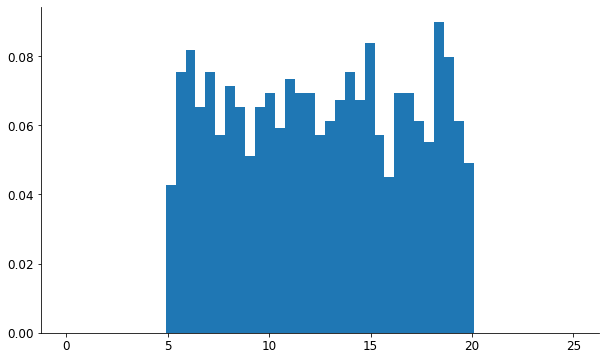

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
bins = np.linspace(0, 25, num=2 * 26)
ax.hist(
    data,
    bins=bins,
    density=True
);

To make sure our estimation ressembles the actual probability density function of a uniform random variable, we will create a function that computes the pdf of a uniform random variable between $a$ and $b$ at an arbitrary point $x$.

### Exercise
What is the probability density function (pdf) of a uniform random variable between $a$ and $b$?



### Exercise
Write a function that gives the density of a uniform random variable between $a$ and $b$ at an arbitrary point $x$. Notice that you can define optional arguments by including them in the definition and giving them a default value.

In [8]:
def uniform_pdf(x, a=0, b=1):
    if x < a:
        return 0
    elif x > b:
        return 0
    else:
        return 1 / (b - a)

Now we can add the expected pdf into the plot. The function `np.linspace(start, stop, num)` generates `num` equally spaced numbers between `start` and `stop`, both included.

In [9]:
x = np.linspace(start=0, stop=25, num=1001)
pdf_x = np.array([
    uniform_pdf(t, a=5, b=20)
    for t in x 
])

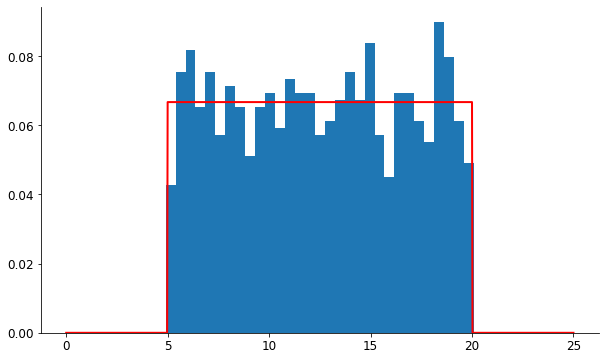

In [10]:
# generate a figure with a single subplot, of some size
fig, ax = plt.subplots(1, 1, figsize=(10, 6))


# plot empirical estimation
bins = np.linspace(0, 25, num=2 * 26)
ax.hist(
    data,
    bins=bins,
    density=True
);

# plot theoretical prediction
ax.plot(
    x, pdf_x,
    color="red",
    lw=2
)

## Adding labels and legend
Clear axis labels and legends are the very important parts of a plot. Without them, we don't know what is what! So, let us add labels, a legend and a title to our plot

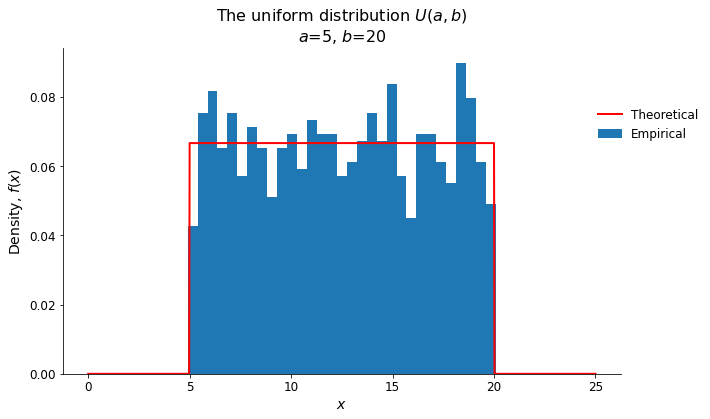

In [11]:
# generate a figure with a single subplot, of some size
fig, ax = plt.subplots(1, 1, figsize=(10, 6))


# plot empirical estimation
bins = np.linspace(0, 25, num=2 * 26)
ax.hist(
    data,
    bins=bins,
    density=True,
    label="Empirical"
);

# plot theoretical prediction
ax.plot(
    x, pdf_x,
    color="red",
    lw=2,
    label="Theoretical"
)

# add labels for axes
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"Density, $f(x)$")

# add legend
ax.legend(loc=(0.95, 0.7), frameon=False)

# add title
ax.set_title(f"The uniform distribution $U(a, b)$\n$a$=5, $b$=20");

### Exercise
Verify that, if the sample size increase, our empirical estimation gets closer to the theoretical prediction. Do so for the following cases:
+ $a=0, b=1$
+ $a=-3, b=-1.2$
+ $a=1800, b=1990$

**Hint**: Instead of copy-pasting the code to generate the figure many times, you could put the code inside a function `plot_comparison(N, a, b)`. The function will have 3 arguments: the sample size $N$ and the bounds $a, b$ of the uniform random variable. You can set a title that depends on the values of $a, b, N$ as follows

```python
ax.set_title(f"The uniform distribution $U(a, b)$\n$a$={a}, $b$={b}, $N$={N}");
```


In [12]:
def plot_comparison(N, a, b):
    # generate the random data
    data = np.random.uniform(a, b, N)
    
    # compute the theoretical distribution
    dx = (b - a) / 10
    x = np.linspace(a - dx, b + dx, num=N)
    
    pdf_x = np.array([
        uniform_pdf(t, a=a, b=b)
        for t in x
    ])
    
    # generate a figure with a single subplot, of some size
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    
    # plot empirical estimation
    ax.hist(
        data, 
        bins="auto", 
        density=True
    )

    # plot theoretical prediction
    ax.plot(
        x, pdf_x,
        color="red",
        lw=2
    )

    # add labels for axes
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"Density, $f(x)$")
    
    # add legend
    ax.legend(["x", "Density"])
    
    # add title
    ax.set_title(f"The uniform distribution U(a, b): $a$={a}, $b$={b}, $N$={N}")
    
    #plt.show() desktop

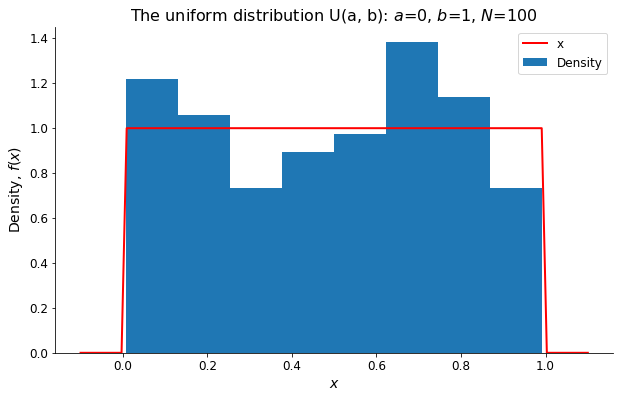

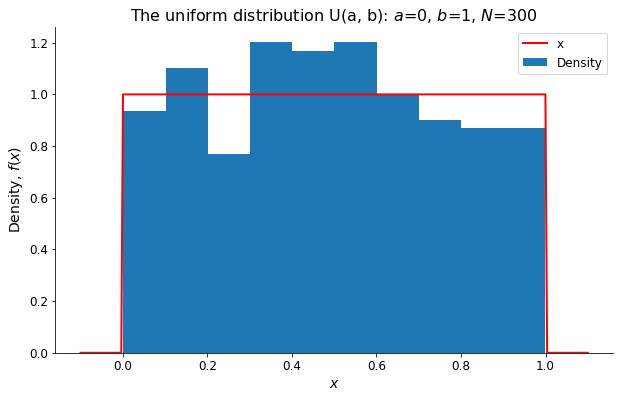

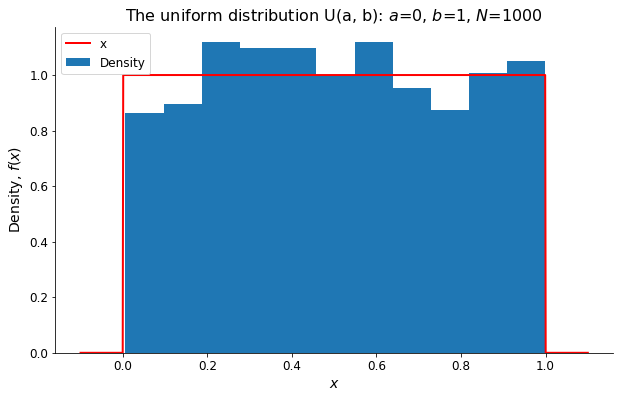

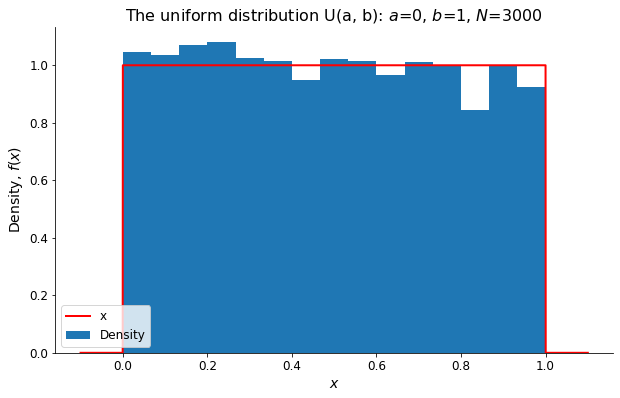

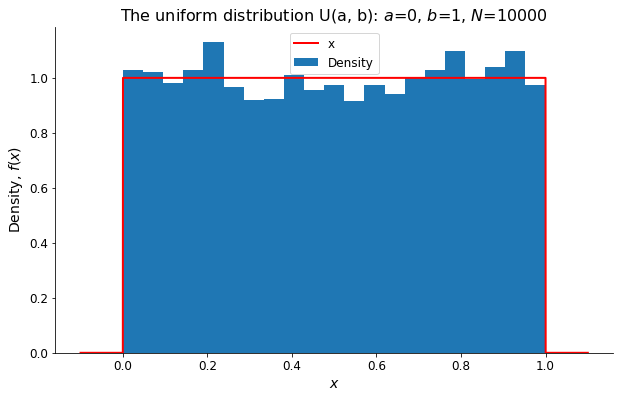

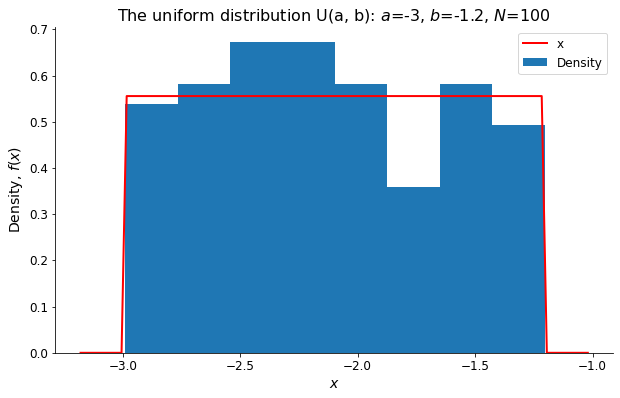

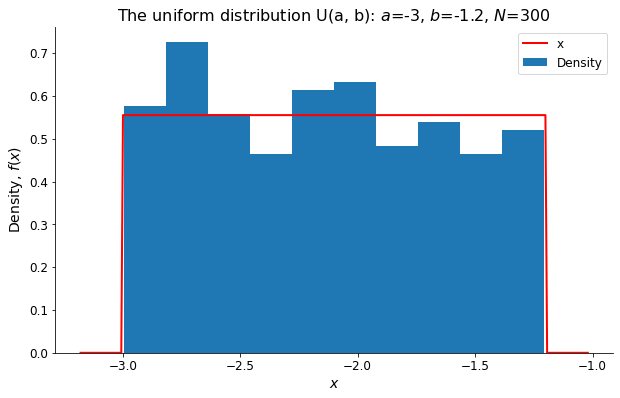

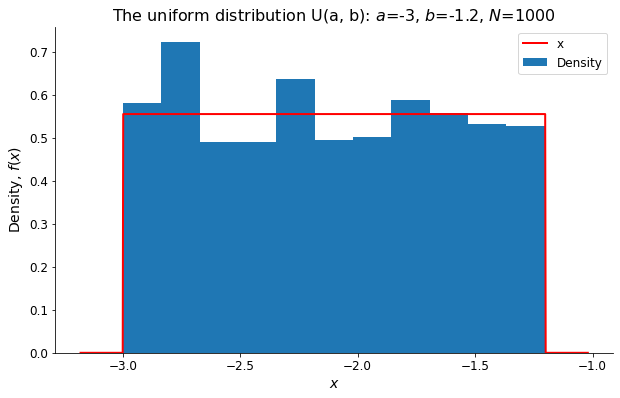

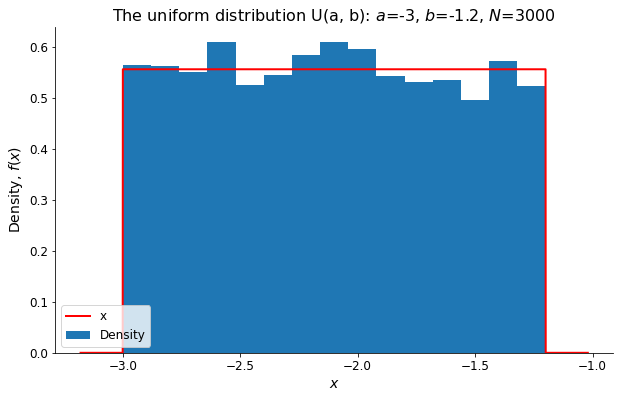

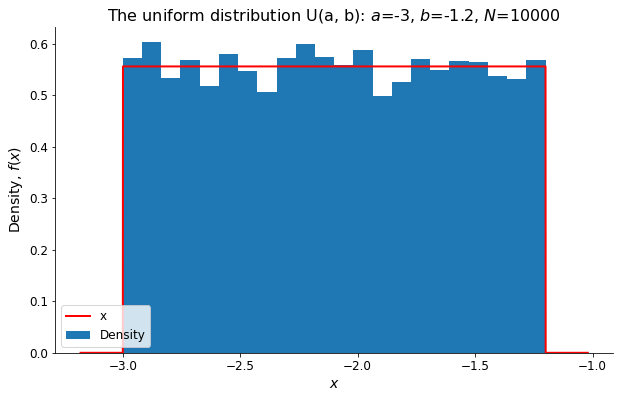

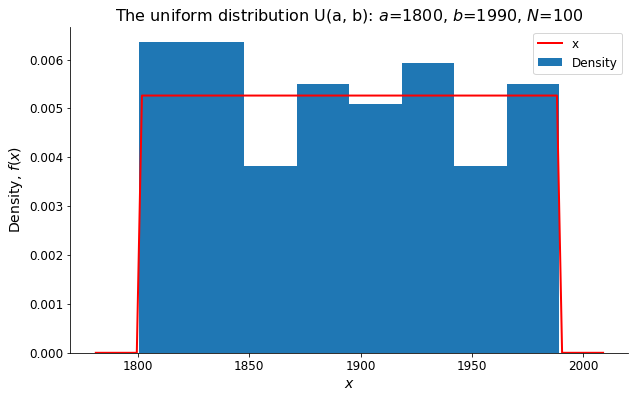

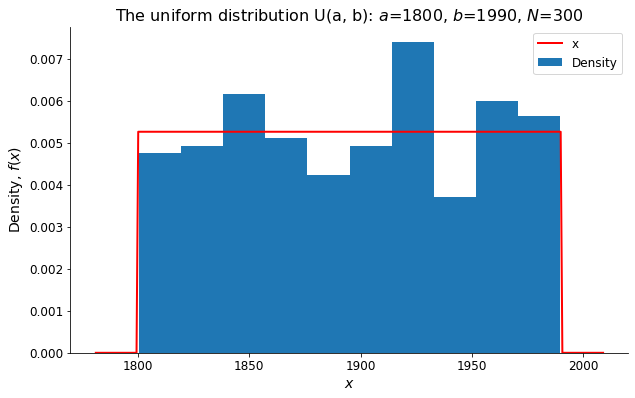

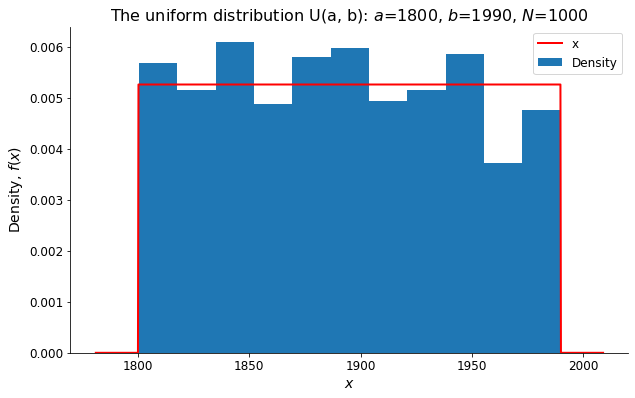

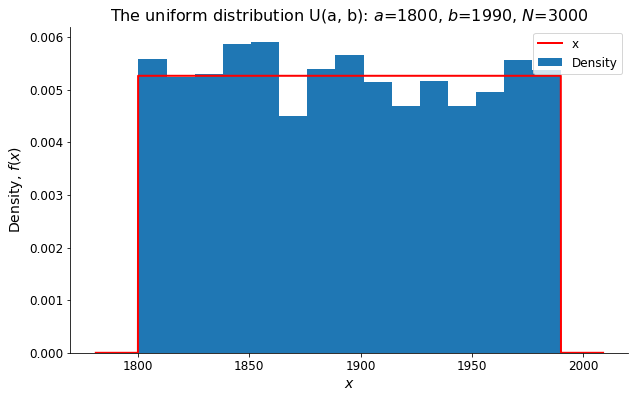

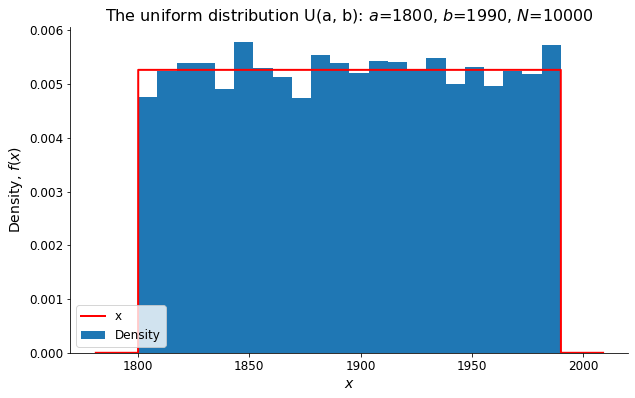

In [13]:
# plot all comparison in a loop
ProfCases=[(0, 1), (-3, -1.2), (1800, 1990)]
Samples=[100, 300, 1000, 3000, 10000]

for (a, b) in ProfCases:
    for N in Samples:
        plot_comparison(N, a, b)

## Generating random numbers with non-uniform distributions
In many cases, we want to draw random numbers from non-uniform distributions. For instance, we might want to generate Gaussian, exponential or Poisson distributed random numbers. How can we do this in plain python?

### Inverse transform sampling
The most general way of generating random numbers under a given distribution is known as **inverse transform sampling**. You can read about the method [here](https://en.wikipedia.org/wiki/Inverse_transform_sampling), but the key theoretical foundation of the method is very simple:

Given a continous random variable $X$ with probability distribution function $p(X)$ and cumulative distribution function $F(X)=\int_{-\infty}^{X}p(X')dX'$, the random variable $F(X)$ has a uniform distribution between 0 and 1. 

$$
F(X) \sim U(0, 1)
$$

Think about it for a second. Here $F(X)$ is not a function, but a random variable, because we apply a function, $F$, to a random variable, $X$, getting a new random variable, $Y \equiv F(X)$. The statement is then simply that $Y$ is a uniform random variable, no matter what form $F$ takes.

As a consequence, one can see that $X = F^{-1}(U)$, where $U$ is a uniform random variable between 0 and 1. This gives as a very simple way of drawing random numbers from an arbitrary continous random variable $X$:

1. Generate a uniform random number, $u$
2. Compute $x = F^{-1}(u)$

where $F$ is the cumulative distribution function of $X$.

### Exercise
Consider the **exponential** distribution, with probability density function 
$$
f(x) = \lambda e^{-\lambda x}
$$
and cumulative distribution function
$$
F(x) = 1 - e^{-\lambda x}
$$
1. Write a function that generates exponentially-distributed random numbers, using the inverse transform sampling method. For simplicity, set $\lambda = 1$.
2. Generate 1000 exponentially-distributed random numbers with your function.
3. Plot a histogram of your generated sample, together with the theoretical probability density function.

In [14]:
def inv_cdf_expo(y):
    # The inverse of y = 1 - exp(-x)
    x = -math.log(1-y)
    return x

def inverse_sampling(size, inv_cdf):
    # generate uniform data of given_size
    # u is a vector
    u = np.random.uniform(size=size)

    # inverse transform it
    x = np.array([
        inv_cdf(t)
        for t in u
    ])
    return x

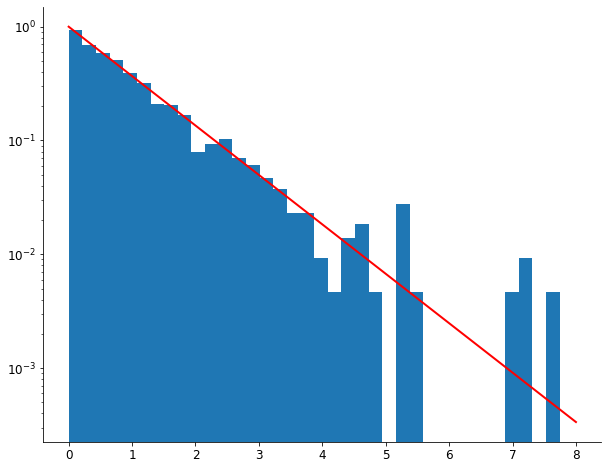

In [15]:
x = np.linspace(0, 8, num=200)
pdf_x = np.array([
    math.exp(-t)
    for t in x
])

data = inverse_sampling(1000, inv_cdf_expo)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

ax.hist(
    data,
    bins= "auto",
    density=True
)

ax.plot(
    x, pdf_x,
    color="red",
    lw=2
)
ax.set_yscale("log")

## In practical situations, do not reinvent the wheel!
What we did so far is a good exercise to get comfortable with python, random number generation, histograms and probabilities.

If you need to generate exponential random numbers as part of a larger project, however, it is better to use a function from a **well-tested**, **well-documented** library such as [numpy](https://docs.scipy.org/doc/numpy) or [scipy](https://docs.scipy.org/doc). For instance:

```python
import numpy as np
x = np.random.exponential(scale=1, size=1000)
```

That is the beauty of **open-source** languages like python: there is a community of developers that contribute their code to standardized libraries in an organized fashion. These libraries are less likely than yours to contain errors or bugs, because they are used by many people and such bugs are reported and fixed very quickly. For instance numpy's `np.random` submodel contains functions to generate random numbers from many distributions, see [the documentation for numpy.random](https://docs.scipy.org/doc/numpy/reference/random/generator.html#distributions).

However, as you can see **not all** distributions are included in numpy. If you need to work with a less well-known distribution, you might need to implement that yourself. In such case, knowing the **inverse sampling** method will come in handy!

